# Q1.1 Python Programming. Web Crawling

In [1]:
import requests
import json
import bs4
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
URL = "https://simple.wikipedia.org/wiki/Climate_change"

In [3]:
all_internal_links = []
all_internal_links.append(URL)

wiki_data = []

In [4]:
def get_urls(links, URL):
    fragments = []
    internal_links = []
    external_links = []

    for link in links:
        href = link.get("href")
        if href != None:
            if href.startswith("#"):
                fragment = f"{URL}{href}" # Convert fragments to absolute URL (fragment)
                fragments.append(fragment)
#                 print("Fragment:", fragment)

            elif href.find("/wiki/") != -1:
                internal = f"https://simple.wikipedia.org{href[href.find('/wiki/'):]}" # Convert relative URL to absolute URL (Internal)
                internal_links.append(internal) 
#                 print("Internal:", internal)

#             elif href.startswith("http") or "www" in href:
            else:
                external_links.append(href) # already absolute URL (External)
#                 print("External:", href)


    return fragments, internal_links, external_links

In [5]:
for i in range(200):
    if i < len(all_internal_links):
        print(f"{i}: Processing: {all_internal_links[i]}")
        
        try:
            result = requests.get(all_internal_links[i])
            
            if result.status_code == 200:
                soup = bs4.BeautifulSoup(result.text, "html.parser")
                links = soup.find(id="bodyContent").find_all("a")
#                 links = soup.select('a')

                fragments, internal_links, external_links = get_urls(links, all_internal_links[i])

                all_internal_links.extend(internal_links)

                frag_count = len(fragments)
                int_count = len(internal_links)
                ext_count = len(external_links)

                script = soup.find("script", {"type":"application/ld+json"})
                timestamp = None

                if script != None:
                    js_data = json.loads("".join(script.contents))

                    if "dateModified" in js_data:
                        timestamp = js_data["dateModified"]
                        print(timestamp)
                    else:
                        print("timestamp: None")
                else:
                    print("script: None")

                print("Fragments Count:", frag_count)
                print("Internal Count:", int_count)
                print("External Count:", ext_count)
                print("-------------------------------\n")

                wiki_data.append([i, int_count, ext_count, frag_count, timestamp])
            else:
                print("Response:", result.status_code)
                print("-------------------------------\n")
        except:
            print(f"Opps! Error occured at: {all_internal_links[i]}")
            print("-------------------------------\n")
            continue
    else:
        print("No more links to visit!")
        break

0: Processing: https://simple.wikipedia.org/wiki/Climate_change
2021-11-13T15:04:47Z
Fragments Count: 18
Internal Count: 23
External Count: 14
-------------------------------

1: Processing: https://simple.wikipedia.org/wiki/Global_warming
2021-12-04T04:18:13Z
Fragments Count: 93
Internal Count: 186
External Count: 72
-------------------------------

2: Processing: https://simple.wikipedia.org/wiki/Climate
2021-10-05T18:32:31Z
Fragments Count: 4
Internal Count: 33
External Count: 6
-------------------------------

3: Processing: https://simple.wikipedia.org/wiki/Earth
2021-11-28T04:18:17Z
Fragments Count: 173
Internal Count: 654
External Count: 208
-------------------------------

4: Processing: https://simple.wikipedia.org/wiki/Global_warming
2021-12-04T04:18:13Z
Fragments Count: 93
Internal Count: 186
External Count: 72
-------------------------------

5: Processing: https://simple.wikipedia.org/wiki/Ice_age
2021-11-10T08:50:11Z
Fragments Count: 8
Internal Count: 36
External Count: 1

2021-11-26T19:08:38Z
Fragments Count: 39
Internal Count: 113
External Count: 44
-------------------------------

47: Processing: https://simple.wikipedia.org/wiki/Oil
2021-11-28T22:44:23Z
Fragments Count: 2
Internal Count: 42
External Count: 1
-------------------------------

48: Processing: https://simple.wikipedia.org/wiki/Natural_gas
2021-10-07T16:58:27Z
Fragments Count: 2
Internal Count: 37
External Count: 9
-------------------------------

49: Processing: https://simple.wikipedia.org/wiki/Carbon_dioxide
2021-11-10T17:46:10Z
Fragments Count: 16
Internal Count: 135
External Count: 18
-------------------------------

50: Processing: https://simple.wikipedia.org/wiki/Carbon
2021-08-25T11:18:43Z
Fragments Count: 53
Internal Count: 458
External Count: 64
-------------------------------

51: Processing: https://simple.wikipedia.org/wiki/Atom
2021-10-29T13:17:57Z
Fragments Count: 50
Internal Count: 214
External Count: 70
-------------------------------

52: Processing: https://simple.wiki

2021-08-11T15:23:34Z
Fragments Count: 13
Internal Count: 46
External Count: 18
-------------------------------

94: Processing: https://simple.wikipedia.org/wiki/Medieval_Warm_Period
2021-03-04T17:48:13Z
Fragments Count: 8
Internal Count: 24
External Count: 14
-------------------------------

95: Processing: https://simple.wikipedia.org/wiki/Little_Ice_Age
2021-10-01T14:43:07Z
Fragments Count: 22
Internal Count: 36
External Count: 49
-------------------------------

96: Processing: https://simple.wikipedia.org/wiki/Ice_age
2021-11-10T08:50:11Z
Fragments Count: 8
Internal Count: 36
External Count: 11
-------------------------------

97: Processing: https://simple.wikipedia.org/wiki/Ice_core
2013-04-14T18:41:19Z
Fragments Count: 6
Internal Count: 23
External Count: 4
-------------------------------

98: Processing: https://simple.wikipedia.org/wiki/Greenhouse_effect
2021-12-01T15:02:25Z
Fragments Count: 6
Internal Count: 45
External Count: 13
-------------------------------

99: Processi

script: None
Fragments Count: 15
Internal Count: 49
External Count: 18
-------------------------------

141: Processing: https://simple.wikipedia.org/wiki/London
2021-10-31T09:06:45Z
Fragments Count: 47
Internal Count: 461
External Count: 113
-------------------------------

142: Processing: https://simple.wikipedia.org/wiki/New_York_City
2021-11-27T15:40:37Z
Fragments Count: 346
Internal Count: 795
External Count: 560
-------------------------------

143: Processing: https://simple.wikipedia.org/wiki/Norfolk,_Virginia
2021-07-24T18:40:31Z
Fragments Count: 2
Internal Count: 192
External Count: 87
-------------------------------

144: Processing: https://simple.wikipedia.org/wiki/Hampton_Roads
2021-10-06T21:55:49Z
Fragments Count: 4
Internal Count: 207
External Count: 145
-------------------------------

145: Processing: https://simple.wikipedia.org/wiki/United_States
2021-11-29T13:02:40Z
Fragments Count: 230
Internal Count: 1362
External Count: 456
-------------------------------

146:

script: None
Fragments Count: 2
Internal Count: 85
External Count: 13
-------------------------------

188: Processing: https://simple.wikipedia.org/wiki/Special:Search/climate_change
2021-11-13T15:04:47Z
Fragments Count: 18
Internal Count: 23
External Count: 14
-------------------------------

189: Processing: https://simple.wikipedia.org/wiki/Special:Search/climate_change
2021-11-13T15:04:47Z
Fragments Count: 18
Internal Count: 23
External Count: 14
-------------------------------

190: Processing: https://simple.wikipedia.org/wiki/Special:Search/climate_change
2021-11-13T15:04:47Z
Fragments Count: 18
Internal Count: 23
External Count: 14
-------------------------------

191: Processing: https://simple.wikipedia.org/wiki/Special:Search/climate_change
2021-11-13T15:04:47Z
Fragments Count: 18
Internal Count: 23
External Count: 14
-------------------------------

192: Processing: https://simple.wikipedia.org/wiki/Special:Search/climate_change
2021-11-13T15:04:47Z
Fragments Count: 18
Int

In [60]:
df = pd.DataFrame(wiki_data, columns=["Pagecount", "INTcount", "EXTcount", "URLfragments", "timestamp"])

In [61]:
df

,Pagecount,INTcount,EXTcount,URLfragments,timestamp
0,0,23,14,18,2021-11-13T15:04:47Z
1,1,186,72,93,2021-12-04T04:18:13Z
2,2,33,6,4,2021-10-05T18:32:31Z
3,3,654,208,173,2021-11-28T04:18:17Z
4,4,186,72,93,2021-12-04T04:18:13Z
5,5,36,11,8,2021-11-10T08:50:11Z
6,6,22,8,4,2020-04-01T12:01:22Z
7,7,365,205,149,2021-08-15T16:46:42Z
8,8,35,13,12,2021-08-26T16:39:41Z
9,9,186,72,93,2021-12-04T04:18:13Z


In [62]:
df.to_csv("Wiki_Data.csv", index=False)

# Q2. Web Crawler Results

## 2.1 Find mean and median

In [2]:
df = pd.read_csv("Wiki_Data.csv")

In [3]:
print("Mean & Median of 'INTcount'")
print("MEAN:", df["INTcount"].mean())
print("MEDIAN:", df["INTcount"].median())

Mean & Median of 'INTcount'
MEAN: 123.44
MEDIAN: 54.0


In [4]:
print("Mean & Median of 'EXTcount'")
print("MEAN:", df["EXTcount"].mean())
print("MEDIAN:", df["EXTcount"].median())

Mean & Median of 'EXTcount'
MEAN: 49.365
MEDIAN: 20.0


In [5]:
print("Mean & Median of 'URLfragments'")
print("MEAN:", df["URLfragments"].mean())
print("MEDIAN:", df["URLfragments"].median())

Mean & Median of 'URLfragments'
MEAN: 29.93
MEDIAN: 14.0


## 2.2 Plot a histogram showing the distribution

### Internal Links

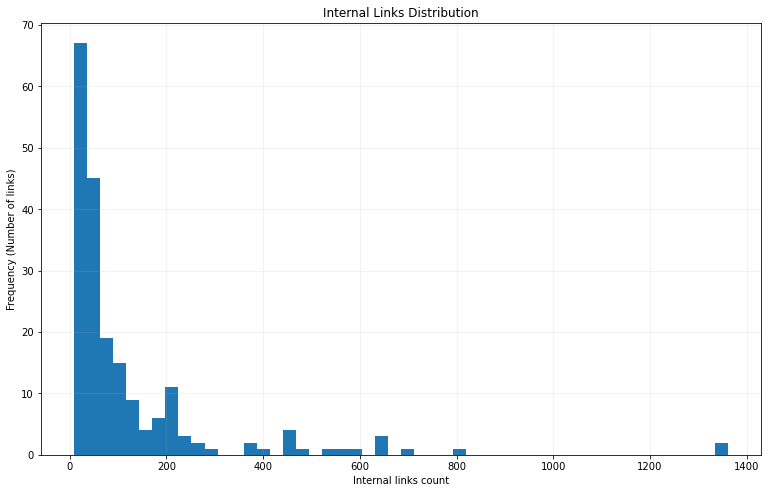

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])

df["INTcount"].plot.hist(ax=ax, bins=50)

ax.set_xlabel("Internal links count")
ax.set_ylabel("Frequency (Number of links)")
ax.set_title("Internal Links Distribution")

ax.grid(alpha = 0.2)

In [7]:
fig.savefig("InternalLinks.png", 
            dpi=100, 
            bbox_inches ="tight",
            pad_inches = 0.5,
            facecolor ="w")

### External Links

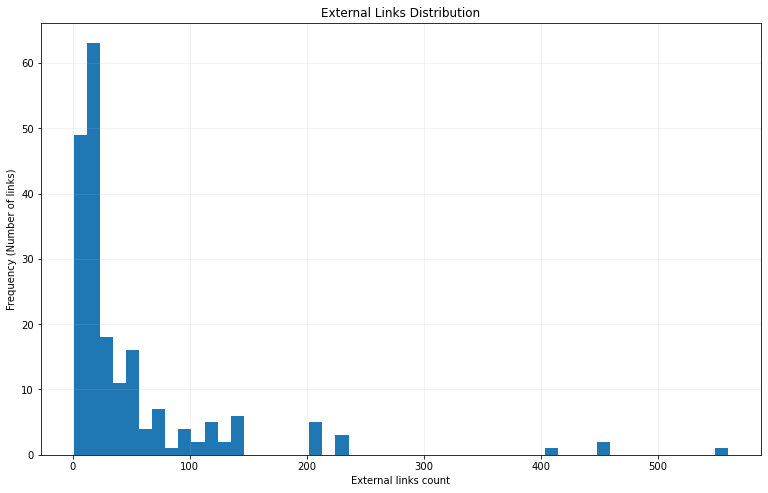

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])

df["EXTcount"].plot.hist(ax=ax, bins=50)

ax.set_xlabel("External links count")
ax.set_ylabel("Frequency (Number of links)")
ax.set_title("External Links Distribution")

ax.grid(alpha = 0.2)

In [9]:
fig.savefig("ExternalLinks.png", 
            dpi=100, 
            bbox_inches ="tight",
            pad_inches = 0.5,
            facecolor ="w")

### URL Fragments

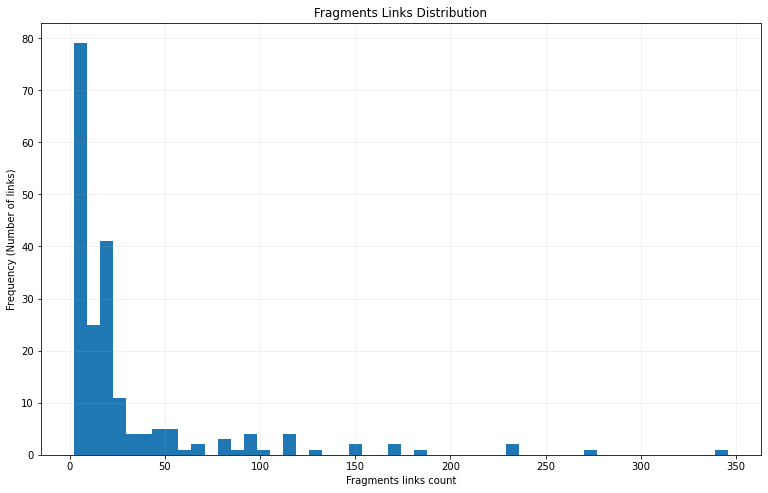

In [10]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])

df["URLfragments"].plot.hist(ax=ax, bins=50)

ax.set_xlabel("Fragments links count")
ax.set_ylabel("Frequency (Number of links)")
ax.set_title("Fragments Links Distribution")

ax.grid(alpha = 0.2)

In [11]:
fig.savefig("URLFragments.png", 
            dpi=100, 
            bbox_inches ="tight",
            pad_inches = 0.5,
            facecolor ="w")

## 2.3 Plot the hour of day at which the page was modified against the frequency

In [18]:
df = df.dropna()

In [19]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [20]:
df

,Pagecount,INTcount,EXTcount,URLfragments,timestamp
0,0,23,14,18,2021-11-13 15:04:47+00:00
1,1,186,72,93,2021-12-04 04:18:13+00:00
2,2,33,6,4,2021-10-05 18:32:31+00:00
3,3,654,208,173,2021-11-28 04:18:17+00:00
4,4,186,72,93,2021-12-04 04:18:13+00:00
...,...,...,...,...,...
195,195,23,14,18,2021-11-13 15:04:47+00:00
196,196,23,14,18,2021-11-13 15:04:47+00:00
197,197,23,14,18,2021-11-13 15:04:47+00:00
198,198,23,14,18,2021-11-13 15:04:47+00:00


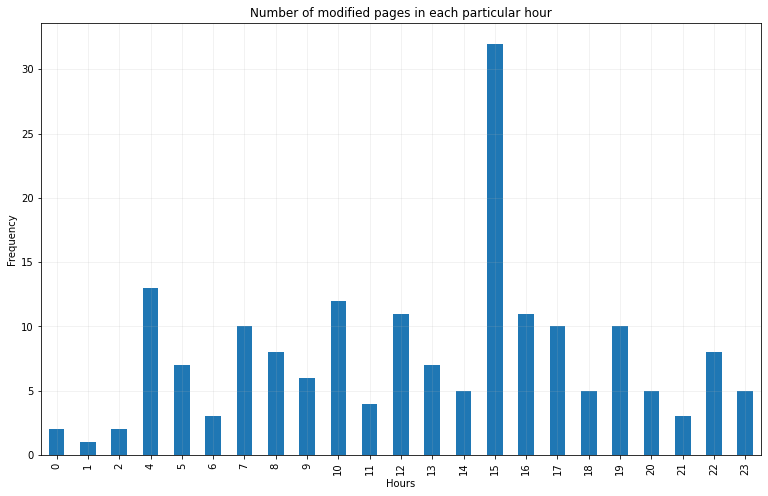

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])

df.groupby(df["timestamp"].dt.hour)["timestamp"].count().plot(kind='bar', ax=ax)

ax.set_xlabel("Hours")
ax.set_ylabel("Frequency")
ax.set_title("Number of modified pages in each particular hour")

ax.grid(alpha = 0.2)

In [22]:
fig.savefig("ModificaionsPerHour.png", 
            dpi=100, 
            bbox_inches ="tight",
            pad_inches = 0.5,
            facecolor ="w")